In [1]:
import numpy as np
import random
import torch
from torch import nn, optim
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
import cifar10_model_drop as cifar10_model_drop
model_file="cifar10_model_drop.pt"
epochs=100
patience = 3
best_loss = float('inf')
counter = 0
# end_loss=0.65

In [3]:
torch.manual_seed(10)
np.random.seed(10)
random.seed(10)

In [4]:
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  # 隨機裁剪圖像
    transforms.RandomHorizontalFlip(),     # 隨機水平翻轉圖像
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2470, 0.2435, 0.2616))
])

In [5]:
train_data=datasets.CIFAR10('data/cifar10/train',train=True,download=True,transform=transform)
print(train_data.data.shape)

Files already downloaded and verified
(50000, 32, 32, 3)


In [6]:
dev_size=0.2
idx=list(range(len(train_data)))
np.random.shuffle(idx)
split_size=int(np.floor(dev_size*len(train_data)))
train_idx, dev_idx=idx[split_size:], idx[:split_size]
train_sampler=SubsetRandomSampler(train_idx)
dev_sampler=SubsetRandomSampler(dev_idx)

In [7]:
batch_size=1000
train_loader= DataLoader(train_data,batch_size=batch_size,sampler=train_sampler)
dev_loader= DataLoader(train_data,batch_size=batch_size,sampler=dev_sampler)
print(len(train_loader),len(dev_loader))

40 10


In [8]:
data_batch,label_batch=next(iter(train_loader))
print(data_batch.size(),label_batch.size())

torch.Size([1000, 3, 32, 32]) torch.Size([1000])


In [9]:
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"deivce:{device}")

deivce:cuda


In [10]:
model=cifar10_model_drop.CNN().to(device)

In [11]:
loss_function = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)

In [12]:
train_losses=[]
dev_losses=[]
x_axis=[]

for epoch in range(epochs+1):
    train_loss=0
    # 訓練資料
    model.train()
    for data,target in tqdm(train_loader):        
        data=data.to(device)
        target=target.to(device)
        
        pred=model(data)
        loss=loss_function(pred,target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss+=loss.item()

    train_loss=train_loss/len(train_loader)
    
    x_axis.append(epoch)
    with torch.no_grad():
        dev_loss=0
        # 驗證資料
        model.eval()
        for data_dev,target_dev in tqdm(dev_loader):               
            data_dev=data_dev.to(device)
            target_dev=target_dev.to(device)

            dev_pred=model(data_dev)
            loss2=loss_function(dev_pred,target_dev)
            dev_loss += loss2.item()

        dev_loss=dev_loss/len(dev_loader)

    train_losses.append(train_loss)
    dev_losses.append(dev_loss)

    print(f"epoch: {epoch}, Train_loss: {train_loss:.3f}, Valid_loss: {dev_loss:.3f}, lr: {scheduler.get_last_lr()}")
    
    scheduler.step()
    
    if dev_loss < best_loss:
        best_loss = dev_loss
        best_epoch = epoch
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print('Early stopping at epoch', epoch)
            break

  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:02<00:00,  4.20it/s]


epoch: 0, Train_loss: 2.010, Valid_loss: 1.753, lr: [0.001]


100%|██████████| 10/10 [00:02<00:00,  4.24it/s]


epoch: 1, Train_loss: 1.622, Valid_loss: 1.498, lr: [0.0009997532801828658]


100%|██████████| 10/10 [00:02<00:00,  4.25it/s]


epoch: 2, Train_loss: 1.451, Valid_loss: 1.365, lr: [0.0009990133642141358]


100%|██████████| 10/10 [00:02<00:00,  4.25it/s]


epoch: 3, Train_loss: 1.315, Valid_loss: 1.252, lr: [0.00099778098230154]


100%|██████████| 10/10 [00:02<00:00,  4.19it/s]


epoch: 4, Train_loss: 1.222, Valid_loss: 1.166, lr: [0.000996057350657239]


100%|██████████| 10/10 [00:02<00:00,  4.26it/s]


epoch: 5, Train_loss: 1.140, Valid_loss: 1.084, lr: [0.0009938441702975688]


100%|██████████| 10/10 [00:02<00:00,  4.23it/s]


epoch: 6, Train_loss: 1.074, Valid_loss: 1.000, lr: [0.0009911436253643444]


100%|██████████| 10/10 [00:02<00:00,  4.25it/s]


epoch: 7, Train_loss: 1.007, Valid_loss: 0.966, lr: [0.0009879583809693736]


100%|██████████| 10/10 [00:02<00:00,  4.21it/s]


epoch: 8, Train_loss: 0.968, Valid_loss: 0.939, lr: [0.0009842915805643154]


100%|██████████| 10/10 [00:02<00:00,  4.17it/s]


epoch: 9, Train_loss: 0.938, Valid_loss: 0.886, lr: [0.0009801468428384714]


100%|██████████| 10/10 [00:02<00:00,  4.26it/s]


epoch: 10, Train_loss: 0.885, Valid_loss: 0.843, lr: [0.0009755282581475767]


100%|██████████| 10/10 [00:02<00:00,  4.17it/s]


epoch: 11, Train_loss: 0.870, Valid_loss: 0.832, lr: [0.0009704403844771127]


100%|██████████| 10/10 [00:02<00:00,  4.10it/s]


epoch: 12, Train_loss: 0.837, Valid_loss: 0.787, lr: [0.0009648882429441257]


100%|██████████| 10/10 [00:02<00:00,  4.27it/s]


epoch: 13, Train_loss: 0.808, Valid_loss: 0.773, lr: [0.0009588773128419905]


100%|██████████| 10/10 [00:02<00:00,  4.22it/s]


epoch: 14, Train_loss: 0.785, Valid_loss: 0.758, lr: [0.0009524135262330098]


100%|██████████| 10/10 [00:02<00:00,  4.03it/s]


epoch: 15, Train_loss: 0.764, Valid_loss: 0.735, lr: [0.0009455032620941839]


100%|██████████| 10/10 [00:02<00:00,  4.25it/s]


epoch: 16, Train_loss: 0.745, Valid_loss: 0.726, lr: [0.0009381533400219318]


100%|██████████| 10/10 [00:02<00:00,  4.23it/s]


epoch: 17, Train_loss: 0.729, Valid_loss: 0.692, lr: [0.0009303710135019719]


100%|██████████| 10/10 [00:02<00:00,  4.21it/s]


epoch: 18, Train_loss: 0.704, Valid_loss: 0.684, lr: [0.0009221639627510076]


100%|██████████| 10/10 [00:02<00:00,  4.29it/s]


epoch: 19, Train_loss: 0.701, Valid_loss: 0.686, lr: [0.000913540287137281]


100%|██████████| 10/10 [00:02<00:00,  4.31it/s]


epoch: 20, Train_loss: 0.681, Valid_loss: 0.664, lr: [0.0009045084971874739]


100%|██████████| 10/10 [00:02<00:00,  4.25it/s]


epoch: 21, Train_loss: 0.671, Valid_loss: 0.656, lr: [0.0008950775061878452]


100%|██████████| 10/10 [00:02<00:00,  4.33it/s]


epoch: 22, Train_loss: 0.665, Valid_loss: 0.634, lr: [0.0008852566213878947]


100%|██████████| 10/10 [00:02<00:00,  4.31it/s]


epoch: 23, Train_loss: 0.645, Valid_loss: 0.636, lr: [0.0008750555348152298]


100%|██████████| 10/10 [00:02<00:00,  4.16it/s]


epoch: 24, Train_loss: 0.626, Valid_loss: 0.626, lr: [0.0008644843137107057]


100%|██████████| 10/10 [00:02<00:00,  4.21it/s]


epoch: 25, Train_loss: 0.632, Valid_loss: 0.619, lr: [0.0008535533905932737]


100%|██████████| 10/10 [00:02<00:00,  4.18it/s]


epoch: 26, Train_loss: 0.620, Valid_loss: 0.611, lr: [0.0008422735529643444]


100%|██████████| 10/10 [00:02<00:00,  4.26it/s]


epoch: 27, Train_loss: 0.611, Valid_loss: 0.605, lr: [0.0008306559326618259]


100%|██████████| 10/10 [00:02<00:00,  4.29it/s]


epoch: 28, Train_loss: 0.595, Valid_loss: 0.585, lr: [0.0008187119948743449]


100%|██████████| 10/10 [00:02<00:00,  4.23it/s]


epoch: 29, Train_loss: 0.586, Valid_loss: 0.576, lr: [0.0008064535268264883]


100%|██████████| 10/10 [00:02<00:00,  4.30it/s]


epoch: 30, Train_loss: 0.578, Valid_loss: 0.585, lr: [0.0007938926261462367]


100%|██████████| 10/10 [00:02<00:00,  4.23it/s]


epoch: 31, Train_loss: 0.575, Valid_loss: 0.583, lr: [0.0007810416889260654]


100%|██████████| 10/10 [00:02<00:00,  4.26it/s]


epoch: 32, Train_loss: 0.567, Valid_loss: 0.569, lr: [0.0007679133974894983]


100%|██████████| 10/10 [00:02<00:00,  4.20it/s]


epoch: 33, Train_loss: 0.562, Valid_loss: 0.561, lr: [0.0007545207078751857]


100%|██████████| 10/10 [00:02<00:00,  4.24it/s]


epoch: 34, Train_loss: 0.544, Valid_loss: 0.572, lr: [0.0007408768370508577]


100%|██████████| 10/10 [00:02<00:00,  4.27it/s]


epoch: 35, Train_loss: 0.541, Valid_loss: 0.561, lr: [0.0007269952498697734]


100%|██████████| 10/10 [00:02<00:00,  4.31it/s]


epoch: 36, Train_loss: 0.535, Valid_loss: 0.552, lr: [0.0007128896457825364]


100%|██████████| 10/10 [00:02<00:00,  4.23it/s]


epoch: 37, Train_loss: 0.533, Valid_loss: 0.545, lr: [0.0006985739453173903]


100%|██████████| 10/10 [00:02<00:00,  4.27it/s]


epoch: 38, Train_loss: 0.521, Valid_loss: 0.551, lr: [0.0006840622763423391]


100%|██████████| 10/10 [00:02<00:00,  4.21it/s]


epoch: 39, Train_loss: 0.519, Valid_loss: 0.535, lr: [0.0006693689601226458]


100%|██████████| 10/10 [00:02<00:00,  4.20it/s]


epoch: 40, Train_loss: 0.518, Valid_loss: 0.537, lr: [0.0006545084971874737]


100%|██████████| 10/10 [00:02<00:00,  4.28it/s]


epoch: 41, Train_loss: 0.504, Valid_loss: 0.522, lr: [0.0006394955530196147]


100%|██████████| 10/10 [00:02<00:00,  4.32it/s]


epoch: 42, Train_loss: 0.494, Valid_loss: 0.525, lr: [0.0006243449435824273]


100%|██████████| 10/10 [00:02<00:00,  4.24it/s]


epoch: 43, Train_loss: 0.492, Valid_loss: 0.524, lr: [0.0006090716206982714]


100%|██████████| 10/10 [00:02<00:00,  4.19it/s]


epoch: 44, Train_loss: 0.483, Valid_loss: 0.514, lr: [0.0005936906572928625]


100%|██████████| 10/10 [00:02<00:00,  4.12it/s]


epoch: 45, Train_loss: 0.490, Valid_loss: 0.517, lr: [0.0005782172325201156]


100%|██████████| 10/10 [00:02<00:00,  4.29it/s]


epoch: 46, Train_loss: 0.475, Valid_loss: 0.516, lr: [0.0005626666167821523]


100%|██████████| 10/10 [00:02<00:00,  4.23it/s]


epoch: 47, Train_loss: 0.466, Valid_loss: 0.513, lr: [0.0005470541566592572]


100%|██████████| 10/10 [00:02<00:00,  4.21it/s]


epoch: 48, Train_loss: 0.467, Valid_loss: 0.513, lr: [0.0005313952597646569]


100%|██████████| 10/10 [00:02<00:00,  4.25it/s]


epoch: 49, Train_loss: 0.460, Valid_loss: 0.495, lr: [0.0005157053795390643]


100%|██████████| 10/10 [00:02<00:00,  4.28it/s]


epoch: 50, Train_loss: 0.454, Valid_loss: 0.498, lr: [0.0005000000000000002]


100%|██████████| 10/10 [00:02<00:00,  4.23it/s]


epoch: 51, Train_loss: 0.456, Valid_loss: 0.494, lr: [0.00048429462046093607]


100%|██████████| 10/10 [00:02<00:00,  4.31it/s]


epoch: 52, Train_loss: 0.450, Valid_loss: 0.503, lr: [0.0004686047402353435]


100%|██████████| 10/10 [00:02<00:00,  4.15it/s]


epoch: 53, Train_loss: 0.440, Valid_loss: 0.490, lr: [0.000452945843340743]


100%|██████████| 10/10 [00:02<00:00,  4.23it/s]


epoch: 54, Train_loss: 0.446, Valid_loss: 0.493, lr: [0.00043733338321784806]


100%|██████████| 10/10 [00:02<00:00,  4.30it/s]


epoch: 55, Train_loss: 0.426, Valid_loss: 0.484, lr: [0.0004217827674798847]


100%|██████████| 10/10 [00:02<00:00,  4.30it/s]


epoch: 56, Train_loss: 0.428, Valid_loss: 0.478, lr: [0.00040630934270713783]


100%|██████████| 10/10 [00:02<00:00,  4.22it/s]


epoch: 57, Train_loss: 0.424, Valid_loss: 0.480, lr: [0.000390928379301729]


100%|██████████| 10/10 [00:02<00:00,  4.19it/s]


epoch: 58, Train_loss: 0.427, Valid_loss: 0.490, lr: [0.0003756550564175727]


100%|██████████| 10/10 [00:02<00:00,  4.22it/s]


epoch: 59, Train_loss: 0.419, Valid_loss: 0.477, lr: [0.00036050444698038553]


100%|██████████| 10/10 [00:02<00:00,  4.21it/s]


epoch: 60, Train_loss: 0.409, Valid_loss: 0.476, lr: [0.00034549150281252655]


100%|██████████| 10/10 [00:02<00:00,  4.25it/s]


epoch: 61, Train_loss: 0.406, Valid_loss: 0.467, lr: [0.0003306310398773544]


100%|██████████| 10/10 [00:02<00:00,  4.26it/s]


epoch: 62, Train_loss: 0.402, Valid_loss: 0.477, lr: [0.00031593772365766127]


100%|██████████| 10/10 [00:02<00:00,  4.28it/s]


epoch: 63, Train_loss: 0.402, Valid_loss: 0.469, lr: [0.0003014260546826097]


100%|██████████| 10/10 [00:02<00:00,  4.26it/s]

epoch: 64, Train_loss: 0.400, Valid_loss: 0.473, lr: [0.0002871103542174637]
Early stopping at epoch 64


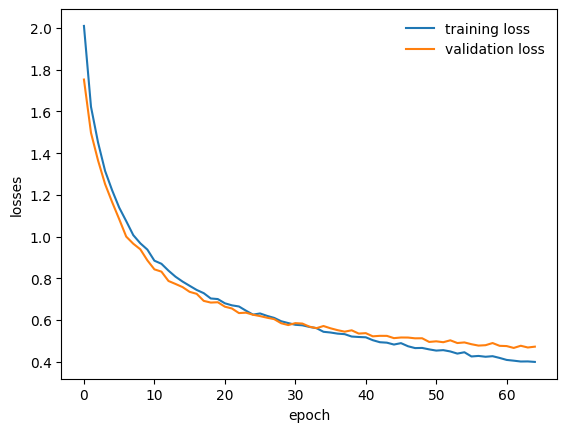

In [13]:
plt.plot(x_axis,train_losses,label="training loss")
plt.plot(x_axis,dev_losses,label="validation loss")
plt.legend(frameon=False)
plt.xlabel('epoch')
plt.ylabel('losses')
plt.show()

In [14]:
model=model.to("cpu")
torch.save(model.state_dict(),model_file)